In [1]:
import pandas
from matplotlib import pyplot
import numpy as np
import seaborn


In [8]:

# 10 are quantitative variables (numerical)
quantitative_variables = ['Elevation', 
 'Aspect', 
 'Slope', 
 'Horizontal_Distance_To_Hydrology', 
 'Vertical_Distance_To_Hydrology', 
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am', 
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points'
]
# 4 are binary wilderness areas (can these overlap?)
wilderness_types = ['w0', 'w1', 'w2', 'w3']
# 40 binary soil type variables (can these overlap?)
soil_types = ['s'+str(i) for i in range(40)]

cover_types = ['cover_type']

colnames = quantitative_variables + wilderness_types + soil_types + cover_types
len(colnames)

55

In [9]:
# Personal notes from covtype.info, about this dataframe...
# There are 12 measures, but 54 columns in the dataframe.
# 10 are quantitative variables (numerical)
# 4 are binary wilderness areas (can these overlap?)
# 40 binary soil type variables (can these overlap?)

df = pandas.read_csv('covtype.data', header=None, names=colnames)

In [10]:
df

,Name,Data type,Measurement,Description,Elevation,E_quantitative,E_meters,Elevation in meters,Aspect,A_quantitative,...,s31,s32,s33,s34,s35,s36,s37,s38,s39,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [20]:
# reverse engineering properties regarding the soil.
wilderness_type_count = df.iloc[:,10:10+4].sum(axis=1) # sum by column to count binary 1s.
print("Are wilderness types one-hot encoded (mutually exclusive)?")
print( all( wilderness_type_count==1 ) )# is every single entry a 1?

# What about the soil type?
print("Are soil types one-hot encoded (mutually exclusive)?")
soil_type_count = df.iloc[:,14:].sum(axis=1) # sum by column to count binary 1s.
print( all( soil_type_count==1 ) )# is every single entry a 1?



Are wilderness types one-hot encoded (mutually exclusive)?
True
Are soil types one-hot encoded (mutually exclusive)?
False


2 8


<AxesSubplot:ylabel='Count'>

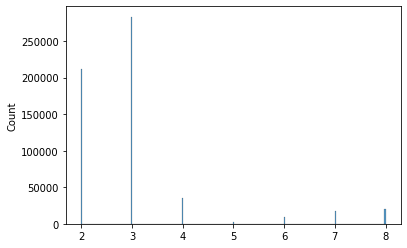

In [22]:
# What do soil types look like across all observations?
# For instance, do we expect 3 soil types for every row? Or, how are they distributed?
print( soil_type_count.min(),soil_type_count.max() )
seaborn.histplot(soil_type_count)

In [36]:
# so, we're seeing the large majority of samples have 2-3 soil types;
# levels off (but not by orders of magnitude) from 4-8 possible soil types.

# How are wilderness types and soil types associated (in a naive way)
# simply by counting overlaps?
wilderness_type = df.iloc[:, 10:10+4]
soil_type = df.iloc[:, 14:]

wilderness_soil_count = soil_type.T.dot(wilderness_type)

# sort by decreasing sum of prevalence (heuristic)
wilderness_soil_count = wilderness_soil_count.iloc[np.argsort(-wilderness_soil_count.sum(axis=1))];

Text(129.91902439024395, 0.5, 'Soil type')

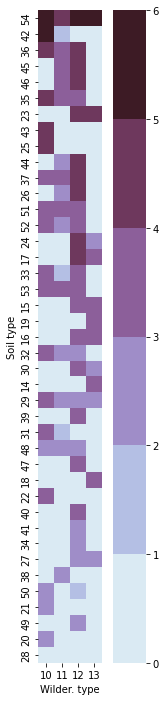

In [52]:
# TODO: attach human readable column names. 
# wilderness types 10-14 shown as column labels;
# soil types 14-54 shown as row labels.
fig,ax = pyplot.subplots(1,1, figsize=(4,12))
cmap=seaborn.cubehelix_palette(start=1, rot=-.5, light=0.9, n_colors=6)

seaborn.heatmap(np.log10(1 + wilderness_soil_count), ax=ax, square=True, vmin=0, vmax=6, cmap=cmap)
ax.set_xlabel('Wilder. type')
ax.set_ylabel('Soil type')